In [7]:
#reload when modified
%load_ext autoreload
%autoreload 2
#activate r magic
%load_ext rpy2.ipython
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import pandas as pd
from IPython.display import Image, display
import os
import re
import tqdm

In [3]:
import svist4get as sv4g

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import utilities as UT
import missingno as msno
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import gc
from io import StringIO
from itertools import islice
from Bio import SeqIO

random.seed(1976)
np.random.seed(1976)

In [5]:
import multiprocessing
multiprocessing.cpu_count()

4

In [47]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)
# Create a DataFrame with 6 columns and 100 rows of random values
df = pd.DataFrame({
    'A': np.random.randint(0, 1000, size=100),
    'B': np.random.randint(0, 1000, size=100),
    'C': np.random.randint(0, 1000, size=100),
    'D': np.random.randint(0, 1000, size=100),
    'E': np.random.randint(0, 1000, size=100),
    'F': np.random.randint(0, 1000, size=100),
})

# Display the first few rows
print(df.shape)
df.head()

(100, 6)


,A,B,C,D,E,F
0,102,555,899,709,472,322
1,435,161,733,415,98,871
2,860,201,484,246,152,685
3,270,957,406,835,860,791
4,106,995,230,438,913,625


In [52]:
%%R -i df
options(warn=-1)
library("limma") 
library("edgeR")
library("cqn")
library("scales")
head(df)

    A   B   C   D   E   F
0 102 555 899 709 472 322
1 435 161 733 415  98 871
2 860 201 484 246 152 685
3 270 957 406 835 860 791
4 106 995 230 438 913 625
5  71 269 748 202 895 287


In [49]:
%%R -o df
group <- factor(c(
    'A','A','A','B','B','B'
))

y <- DGEList(counts=df, group=group)
keep <- filterByExpr(y, min.count = 100, min.total.count = 2000)
y <- y[keep,,keep.lib.sizes=FALSE]
counts = y$counts
genes = row.names(y)

In [50]:
%R -o counts,genes
indata = pd.DataFrame(counts,index=genes,columns=indata.columns)
indata.shape

(95, 6)

In [54]:
%%R -i indata
#https://rstudio-pubs-static.s3.amazonaws.com/79395_b07ae39ce8124a5c873bd46d6075c137.html
library(edgeR)
# Make groups
design_with_all <- model.matrix( ~0+group )

y <- DGEList(counts=indata, 
                  group = group, 
                  )
# Estimate dispersion
y <- estimateGLMCommonDisp( y, design_with_all )
y <- estimateGLMTrendedDisp( y, design_with_all )
y <- estimateGLMTagwiseDisp( y, design_with_all )
# Fit counts to model
fit_all <- glmQLFit( y, design_with_all )


In [55]:
%%R
contrast <- glmQLFTest(fit_all, contrast=makeContrasts( groupA-groupB, levels=design_with_all ) )
table <- topTags(contrast, n=Inf, sort.by = "none", adjust.method="BH")$table
head(table)

        logFC   logCPM           F    PValue       FDR
0  0.06597355 13.34298 0.005686085 0.9406702 0.9719433
1  0.04059561 13.14642 0.001846354 0.9661689 0.9719433
2  0.63753291 13.12779 0.474061532 0.4993443 0.9719433
3 -0.55140493 13.77109 0.744456113 0.3988653 0.9719433
4 -0.51947133 13.45730 0.360391428 0.5552954 0.9719433
5 -0.34710021 13.03854 0.119907431 0.7328934 0.9719433


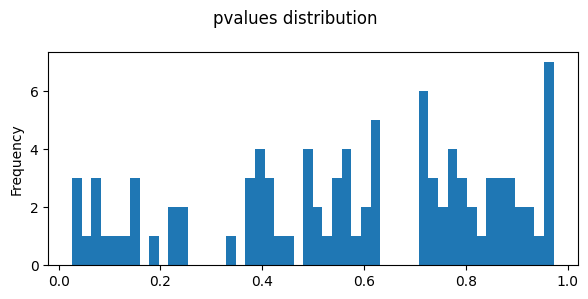

In [61]:
%R -o table
fig,axes=plt.subplots(ncols=1,nrows=1,figsize=(6,3))
table.PValue.plot(kind='hist',bins=50,ax=axes)
plt.suptitle('pvalues distribution')
plt.tight_layout()
plt.show()

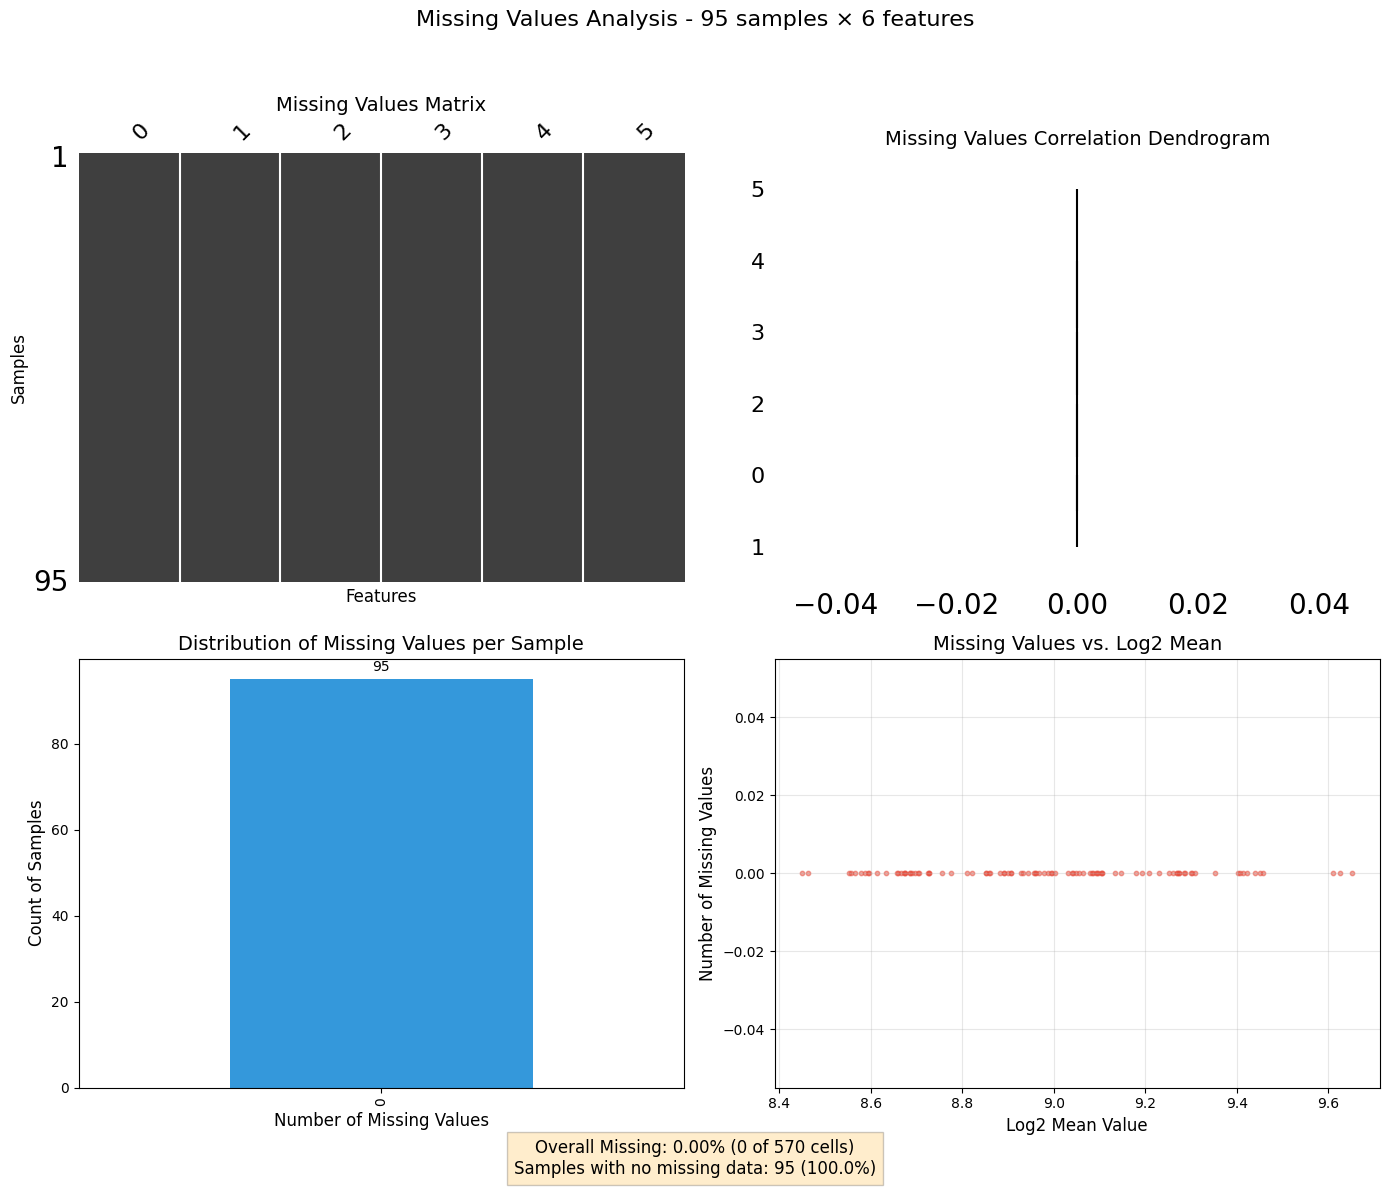

In [65]:
from ProjectUtility.mis_val_utility import *
mv_analyzer = MissingValuesAnalyzer(indata)
# Generate the dashboard
fig, axes, summary = mv_analyzer.plot_missing_dashboard()